# Importing modules & libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml models

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier   #pip install xgboost

from sklearn.metrics import accuracy_score

# converting it into website
import mercury as mr # for widgets
import random 

import warnings
from scipy.stats import norm
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
app = mr.App(title="Static notebook", description="Display static notebook", static_notebook=True)

mercury.App

# About Dataset
```This dataset is originally from the National Institute of Diabetes and Digestive and Kidney```
```Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,```
```based on certain diagnostic measurements included in the dataset. Several constraints were placed```
```on the selection of these instances from a larger database. In particular, all patients here are females```
```at least 21 years old of Pima Indian heritage.2```
```From the data set in the (.csv) File We can find several variables, some of them are independent```
```(several medical predictor variables) and only one target dependent variable (Outcome).```

## Information about dataset attributes -

* ```Pregnancies```: To express the Number of pregnancies
* ```Glucose```: To express the Glucose level in blood
* ```BloodPressure```: To express the Blood pressure measurement
* ```SkinThickness```: To express the thickness of the skin
* ```Insulin```: To express the Insulin level in blood
* ```BMI```: To express the Body mass index
* ```DiabetesPedigreeFunction```: To express the Diabetes percentage
* ```Age```: To express the age
* ```Outcome```: To express the final result 1 is Yes and 0 is No

### Importing the training and testing data set

In [2]:
train = pd.read_csv("../DataSets/Training.csv")
test = pd.read_csv("../DataSets/Testing.csv")

In [3]:
train.shape

(2460, 9)

In [4]:
test.shape

(308, 9)

In [5]:
train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [6]:
train.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2458,1,96,64,27,87,33.2,0.289,21,0
2459,6,105,70,32,68,30.8,0.122,37,0


In [7]:
train.sample(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2031,1,87,60,37,75,37.2,0.509,22,0
1444,9,112,82,32,175,34.2,0.260,36,1


<Axes: >

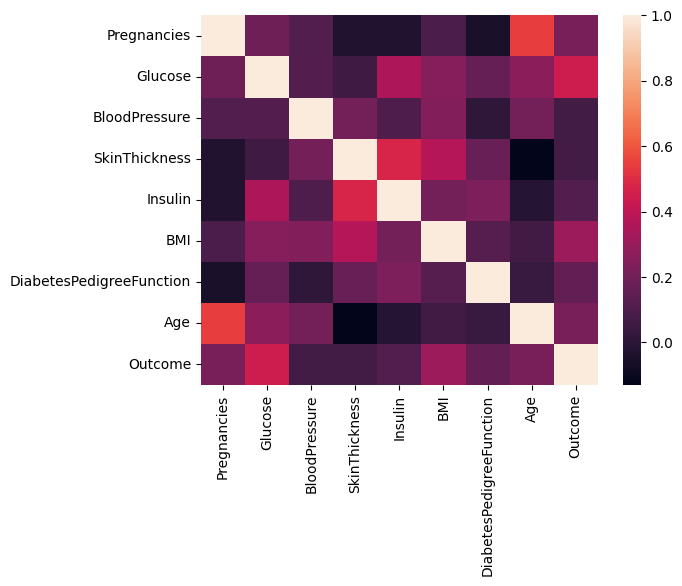

In [8]:
sns.heatmap(train.corr())

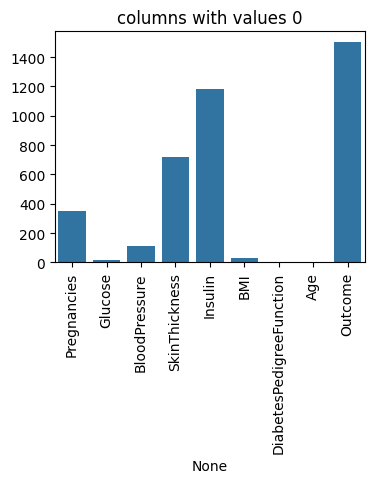

In [9]:
zero_counts = (train == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts.index, y=zero_counts.values)
plt.xticks(rotation=90)
plt.title("columns with values 0")
plt.show()

### Ignoring ```Pregnancies``` and ```Outcome``` as they can be valued 0 here

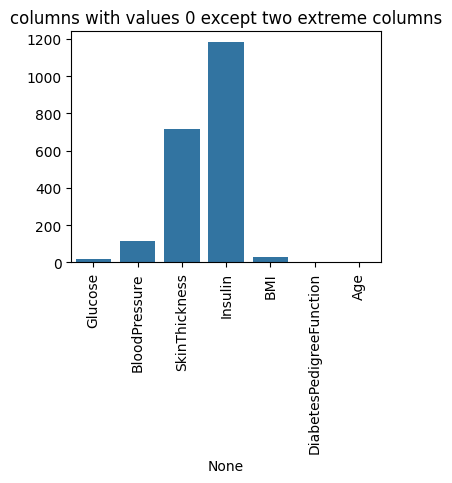

In [10]:
zero_counts_mod = (train.iloc[:,1:8] == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts_mod.index, y=zero_counts_mod.values)
plt.xticks(rotation=90)
plt.title("columns with values 0 except two extreme columns")
plt.show()

In [11]:
print(f"Glucose => {(train['Glucose']==0).sum()}")
print(f"BloodPressure => {(train['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(train['SkinThickness']==0).sum()}")
print(f"Insulin => {(train['Insulin']==0).sum()}")
print(f"BMI => {(train['BMI']==0).sum()}")

Glucose => 17
BloodPressure => 114
SkinThickness => 717
Insulin => 1181
BMI => 31


In [12]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    train = train[train[column] != 0]

In [13]:
print(f"Glucose => {(train['Glucose']==0).sum()}")
print(f"BloodPressure => {(train['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(train['SkinThickness']==0).sum()}")
print(f"Insulin => {(train['Insulin']==0).sum()}")
print(f"BMI => {(train['BMI']==0).sum()}")

Glucose => 0
BloodPressure => 0
SkinThickness => 0
Insulin => 0
BMI => 0


In [14]:
t = train.sample(n=1000,replace=True,random_state=1)
train = pd.concat([train,t],ignore_index=True)
train.reset_index(drop=True,inplace=True)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,0,137,40,35,168,43.1,2.288,33,1
2,3,78,50,32,88,31.0,0.248,26,1
3,2,197,70,45,543,30.5,0.158,53,1
4,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
2263,0,165,76,43,255,47.9,0.259,26,0
2264,4,197,70,39,744,36.7,2.329,31,0
2265,10,148,84,48,237,37.6,1.001,51,1
2266,1,112,72,30,176,34.4,0.528,25,0


In [15]:
train.shape

(2268, 9)

### Dataset clearing done now 

## EDA

In [16]:
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2268 non-null   int64  
 1   Glucose                   2268 non-null   int64  
 2   BloodPressure             2268 non-null   int64  
 3   SkinThickness             2268 non-null   int64  
 4   Insulin                   2268 non-null   int64  
 5   BMI                       2268 non-null   float64
 6   DiabetesPedigreeFunction  2268 non-null   float64
 7   Age                       2268 non-null   int64  
 8   Outcome                   2268 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 159.6 KB


In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2268.0,3.348765,3.243610,0.000,1.000,2.000,5.000,17.00
Glucose,2268.0,123.472222,30.696698,71.000,100.000,119.000,144.000,197.00
BloodPressure,2268.0,70.402557,11.811665,30.000,64.000,70.000,78.000,110.00
SkinThickness,2268.0,29.181217,10.703085,7.000,21.000,29.000,37.000,63.00
Insulin,2268.0,155.784832,122.907016,14.000,74.000,120.000,192.000,846.00
BMI,2268.0,32.900000,7.053362,19.300,27.800,33.100,36.700,67.10
DiabetesPedigreeFunction,2268.0,0.525190,0.383455,0.088,0.264,0.434,0.673,2.42
Age,2268.0,30.585538,10.099732,21.000,24.000,27.000,34.000,81.00
Outcome,2268.0,0.368607,0.482533,0.000,0.000,0.000,1.000,1.00


In [19]:
train.Pregnancies.value_counts()

Pregnancies
1     565
2     368
0     288
4     214
3     207
5     178
6      91
8      83
9      76
7      73
10     43
12     23
11     16
13     14
17     14
15     10
14      5
Name: count, dtype: int64

## Pairplot with respect to Outcome to check and then Boxplot

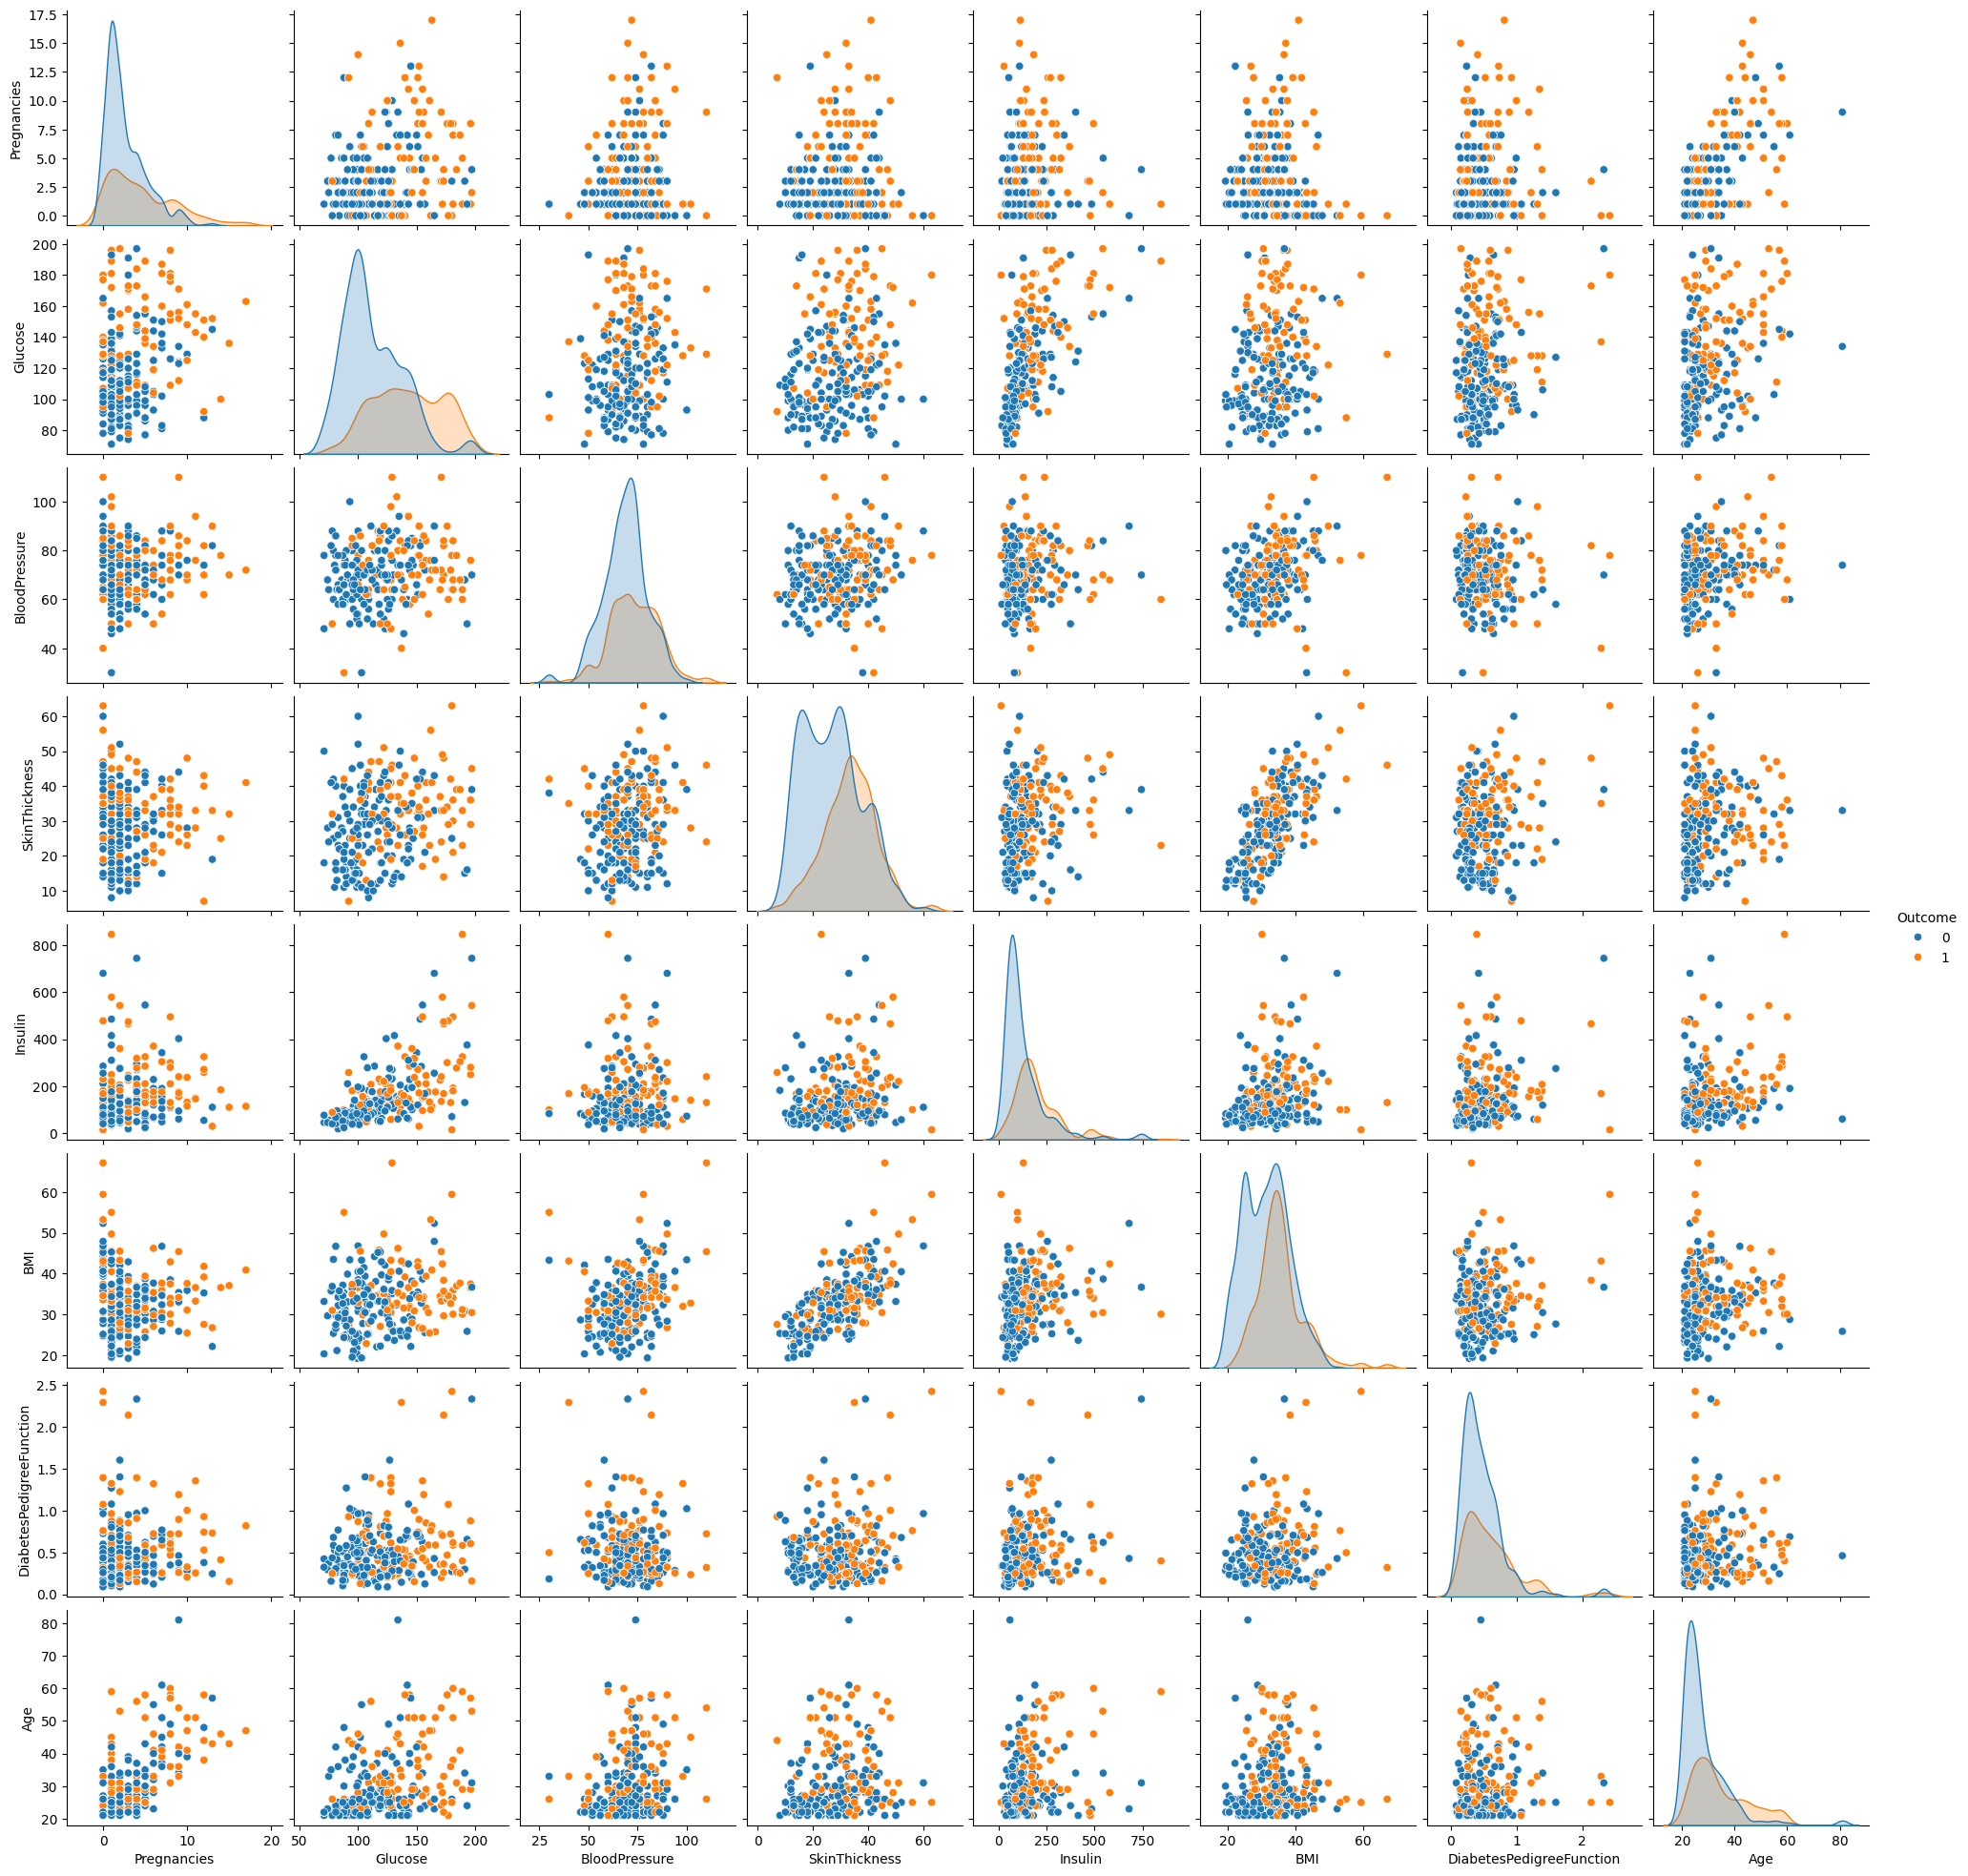

In [20]:
import seaborn as sns

# Assuming 'train' is your DataFrame
sns.pairplot(train, hue='Outcome')

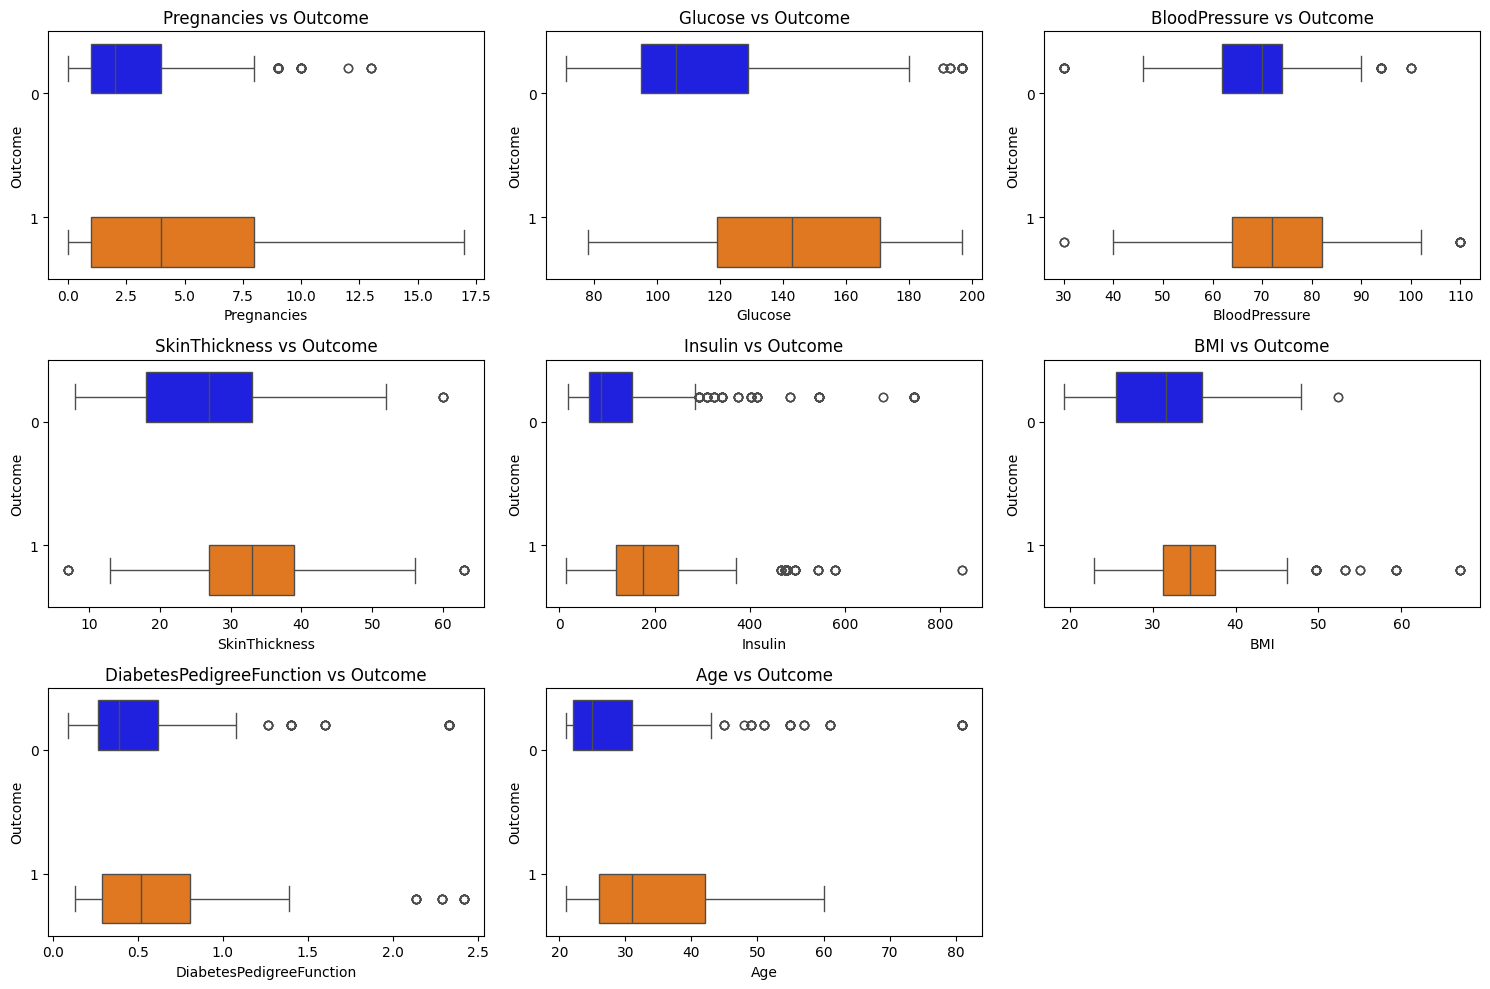

In [21]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
counter=0
plt.figure(figsize=(15, 10)) 
palette = {str(i): v for i, v in enumerate(['blue', '#FF7600'])}
for column in columns:
    counter+=1
    plt.subplot(3,3,counter) 
    sns.boxplot(x=column, y='Outcome', data=train, orient='h',dodge=True,palette=palette)
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()


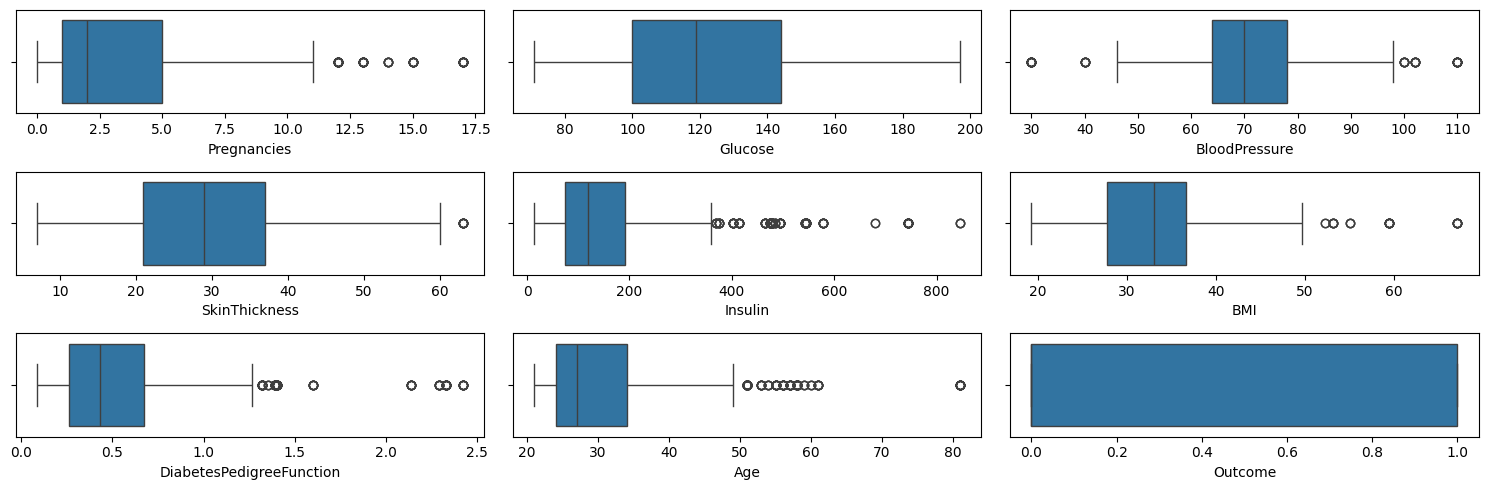

In [22]:
counter=0
plt.figure(figsize=(15,5))
for i in train.columns:
    counter+=1
    plt.subplot(3,3,counter)
    sns.boxplot(x=i,data=train,orient='v')
plt.tight_layout()

In [23]:
def OutLiersRemoval(train,col,th=1.5):
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)

    iqr = q3 - q1

    low_lim = q1 - th*iqr
    high_lim = q3 + th*iqr

    train = train[(train[col] >= low_lim) & (train[col] <= high_lim)]
    print("{} of dataset after column {}".format(train.shape, col))

    return train

In [24]:
for i in train.columns:
    train = OutLiersRemoval(train,i)

(2202, 9) of dataset after column Pregnancies
(2202, 9) of dataset after column Glucose
(2153, 9) of dataset after column BloodPressure
(2144, 9) of dataset after column SkinThickness
(2022, 9) of dataset after column Insulin
(2001, 9) of dataset after column BMI
(1913, 9) of dataset after column DiabetesPedigreeFunction
(1789, 9) of dataset after column Age
(1789, 9) of dataset after column Outcome


In [25]:
print(f"new shape is {train.shape}")

new shape is (1789, 9)


# Feature Engineering

### Distplot for normal distribution

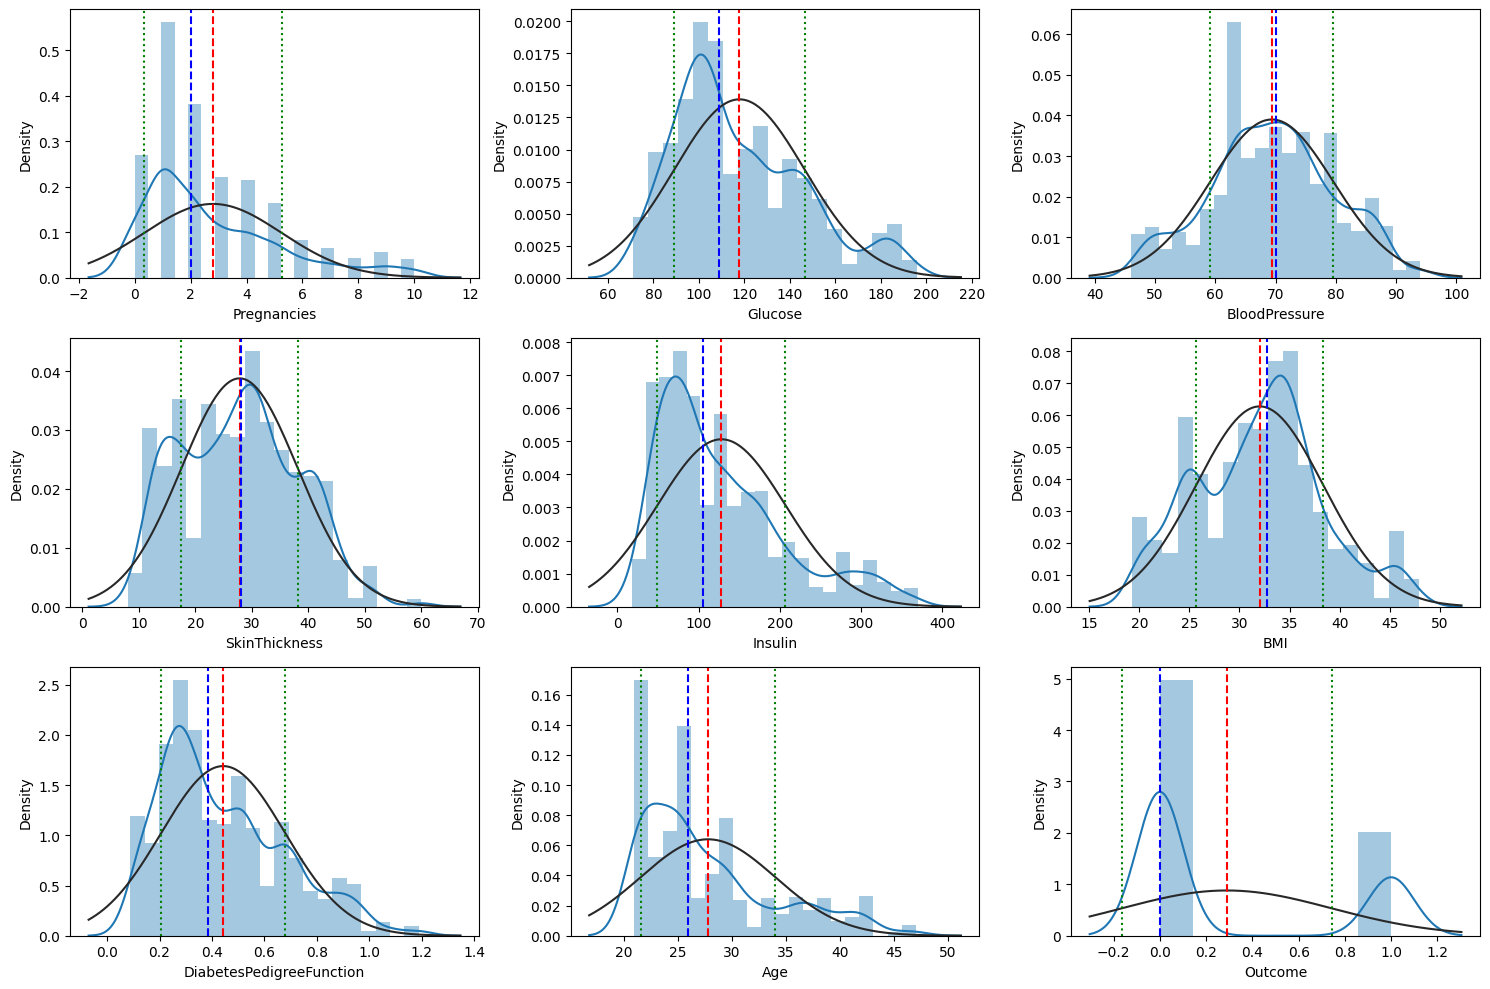

In [26]:
counter=0
plt.figure(figsize=(15,10))

for i in train.columns:
    counter+=1
    plt.subplot(3,3,counter)
    sns.distplot(train[i], fit=norm, kde=True)
    
    # Calculate the mean and standard deviation
    mean = train[i].mean()
    std_dev = train[i].std()
    median = train[i].median()
    
    # Add lines for the mean, mean + std_dev and mean - std_dev
    plt.axvline(mean, color='r', linestyle='--')
    plt.axvline(median , color = 'b',linestyle='--' )
    plt.axvline(mean + std_dev, color='g', linestyle=':')
    plt.axvline(mean - std_dev, color='g', linestyle=':')
    
plt.tight_layout()
plt.show()


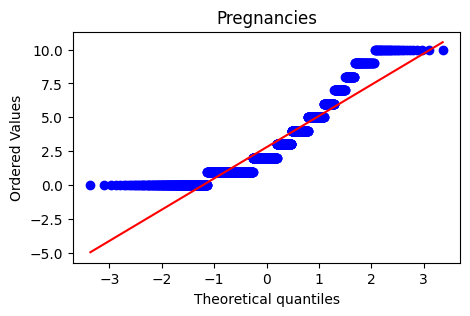

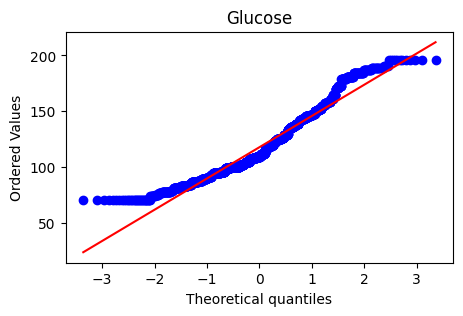

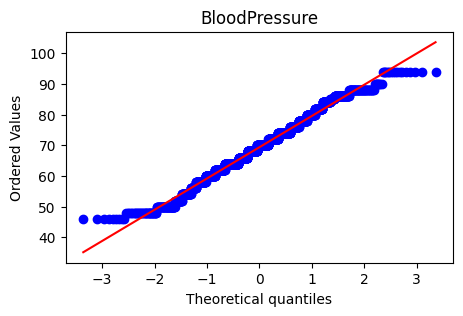

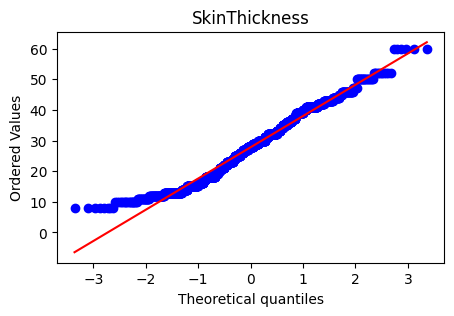

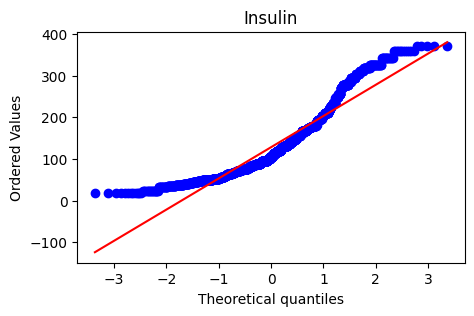

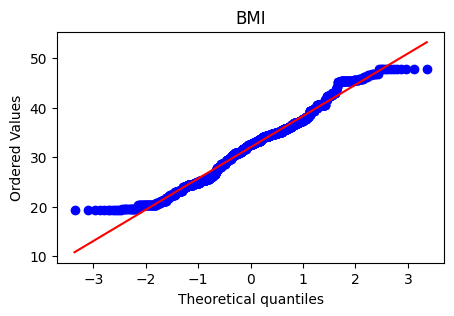

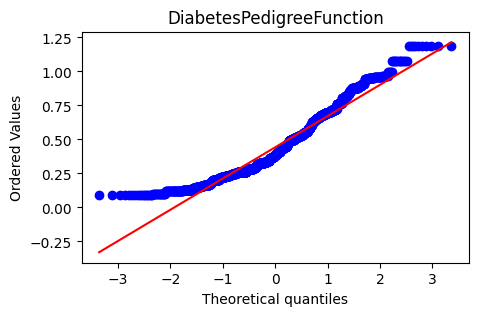

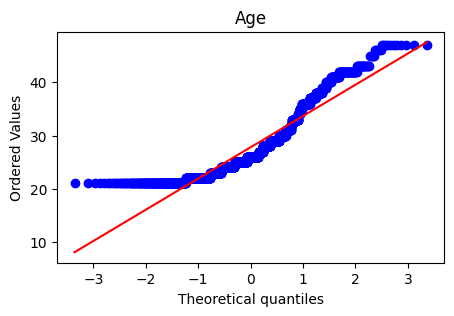

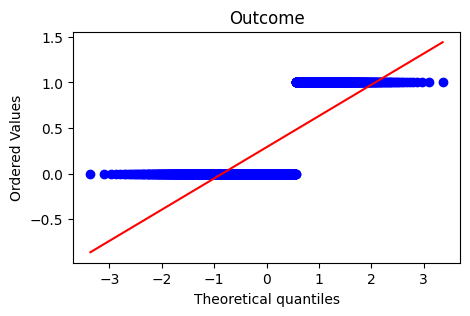

In [27]:
import scipy.stats as s
for i in train.columns:
    plt.figure(figsize=(5,3))
    s.probplot(train[i], plot = plt)
    plt.title(i)
    plt.show()

## Skewness of the dataframe

In [28]:
# Initialize an empty DataFrame
df_pearson = pd.DataFrame(columns=['Column', 'Pearson'])

for c in train.columns:
    mean = train[c].mean()
    median = train[c].median()
    std = train[c].std()
    # Pearson's second coefficient = 3(mean - median)/std
    pearson = (3 * (mean - median)) / std
    
    # Create a DataFrame for the current column
    df_temp = pd.DataFrame({'Column': [c], 'Pearson': [pearson]})
    
    # Concatenate with df_pearson
    df_pearson = pd.concat([df_pearson, df_temp], ignore_index=True)

# Print the DataFrame
df_pearson


,Column,Pearson
0,Pregnancies,0.972006
1,Glucose,0.926007
2,BloodPressure,-0.179477
3,SkinThickness,-0.053414
4,Insulin,0.876902
5,BMI,-0.322352
6,DiabetesPedigreeFunction,0.733602
7,Age,0.867107
8,Outcome,1.912060


## Train_Test_Split

In [29]:
x_train = train.iloc[:,0:7]
y_train = train.iloc[:,8]
x_test = test.iloc[:,0:7]
y_test = test.iloc[:,8]

In [30]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,89,66,23,94,28.1,0.167
2,3,78,50,32,88,31.0,0.248
6,0,118,84,47,230,45.8,0.551
8,1,115,70,30,96,34.6,0.529
9,3,126,88,41,235,39.3,0.704
...,...,...,...,...,...,...,...
2261,2,146,70,38,360,28.0,0.337
2262,3,78,50,32,88,31.0,0.248
2263,0,165,76,43,255,47.9,0.259
2266,1,112,72,30,176,34.4,0.528


In [31]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,9,120,72,22,56,20.8,0.733
1,1,71,62,0,0,21.8,0.416
2,8,74,70,40,49,35.3,0.705
3,5,88,78,30,0,27.6,0.258
4,10,115,98,0,0,24.0,1.022
...,...,...,...,...,...,...,...
303,10,101,76,48,180,32.9,0.171
304,2,122,70,27,0,36.8,0.340
305,5,121,72,23,112,26.2,0.245
306,1,126,60,0,0,30.1,0.349


In [32]:
y_train

0       0
2       1
6       1
8       1
9       0
       ..
2261    1
2262    1
2263    0
2266    0
2267    0
Name: Outcome, Length: 1789, dtype: int64

In [33]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
303    0
304    0
305    0
306    1
307    0
Name: Outcome, Length: 308, dtype: int64

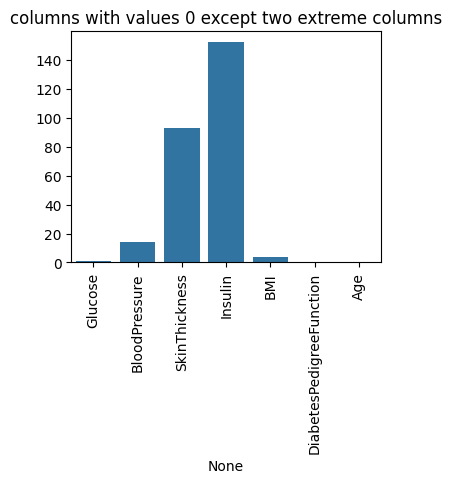

In [34]:
zero_counts_mod = (test.iloc[:,1:8] == 0).sum()
plt.figure(figsize=(4,3))
sns.barplot(x=zero_counts_mod.index, y=zero_counts_mod.values)
plt.xticks(rotation=90)
plt.title("columns with values 0 except two extreme columns")
plt.show()

### from the above we can see that the test dataset has many anomalies and we have to exclude those that are hindrance in this test so we will be checking the dataset of both stages

In [35]:
print(f"Glucose => {(test['Glucose']==0).sum()}")
print(f"BloodPressure => {(test['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(test['SkinThickness']==0).sum()}")
print(f"Insulin => {(test['Insulin']==0).sum()}")
print(f"BMI => {(test['BMI']==0).sum()}")

Glucose => 1
BloodPressure => 14
SkinThickness => 93
Insulin => 152
BMI => 4


In [36]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns:
    test = test[test[column] != 0]

In [37]:
print(f"Glucose => {(test['Glucose']==0).sum()}")
print(f"BloodPressure => {(test['BloodPressure']==0).sum()}")
print(f"SkinThickness => {(test['SkinThickness']==0).sum()}")
print(f"Insulin => {(test['Insulin']==0).sum()}")
print(f"BMI => {(test['BMI']==0).sum()}")

Glucose => 0
BloodPressure => 0
SkinThickness => 0
Insulin => 0
BMI => 0


In [38]:
test.reset_index(drop=True,inplace=True)
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,8,74,70,40,49,35.3,0.705,39,0
2,0,124,56,13,105,21.8,0.452,21,0
3,0,74,52,10,36,27.8,0.269,22,0
4,0,97,64,36,100,36.8,0.600,25,0
...,...,...,...,...,...,...,...,...,...
151,0,181,88,44,510,43.3,0.222,26,1
152,1,128,88,39,110,36.5,1.057,37,1
153,2,88,58,26,16,28.4,0.766,22,0
154,10,101,76,48,180,32.9,0.171,63,0


New test

In [39]:
x_test_new = test.iloc[:,0:7]
y_test_new = test.iloc[:,8]

In [40]:
x_test_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,9,120,72,22,56,20.8,0.733
1,8,74,70,40,49,35.3,0.705
2,0,124,56,13,105,21.8,0.452
3,0,74,52,10,36,27.8,0.269
4,0,97,64,36,100,36.8,0.600
...,...,...,...,...,...,...,...
151,0,181,88,44,510,43.3,0.222
152,1,128,88,39,110,36.5,1.057
153,2,88,58,26,16,28.4,0.766
154,10,101,76,48,180,32.9,0.171


In [41]:
preprocessor = StandardScaler()

classifiers = [
    ('lr', LogisticRegression()),
    ('svm', SVC()),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier()),
    ('ann', MLPClassifier())
]

In [47]:
print("For unrefined Test set\n\n")

for classifier_name, classifier in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier_name', classifier)])
    # You can now fit and transform the pipeline
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test)
    accuracy = accuracy_score(y_test,predictions)
    print(f"Accuracy of {classifier}: {accuracy}\n")

For unrefined Test set


Accuracy of LogisticRegression(): 0.7824675324675324

Accuracy of SVC(): 0.685064935064935

Accuracy of DecisionTreeClassifier(): 0.685064935064935

Accuracy of KNeighborsClassifier(): 0.698051948051948

Accuracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 

In [48]:
print("For refined Test set\n\n")

for classifier_name, classifier in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier_name', classifier)])
    # You can now fit and transform the pipeline
    pipeline.fit(x_train, y_train)
    predictions = pipeline.predict(x_test_new)
    accuracy = accuracy_score(y_test_new,predictions)
    print(f"Accuracy of {classifier}: {accuracy}\n")

For refined Test set


Accuracy of LogisticRegression(): 0.8205128205128205

Accuracy of SVC(): 0.7307692307692307

Accuracy of DecisionTreeClassifier(): 0.6923076923076923

Accuracy of KNeighborsClassifier(): 0.7307692307692307

Accuracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):

In [3]:
mercury run

SyntaxError: invalid syntax (4065731860.py, line 1)